In [1]:
//%jsroot on

In [2]:
TCanvas *c1=new TCanvas;

In [3]:
  TGraph *grate=new TGraph();
  TGraph *grate2=new TGraph();
  TGraph *grate_6100=new TGraph();
  TGraph *grate2_1=new TGraph();
  TGraph *grate_7000=new TGraph();
  TGraph *grate2_2=new TGraph();
  TGraph *grate2_all=new TGraph();
Double_t temptheta,temprate,aa;
Int_t countrate=0,countrate_6100=0,countrate_7000=0;
ifstream inr("/home/zhuhy/JNBook/Experiment2022/taf/else/txt/r149_16N_d_3He_cm_0_zhangyun_LCTJPG.txt");
  if(inr.is_open()){
    while(!inr.eof())
    {
      inr>>temptheta>>temprate>>aa;
      grate->SetPoint(countrate++,temptheta,temprate);
      //cout<<therunnumber<<'\t'<<accpttedrate[therunnumber]<<'\n';
    }
  }
  inr.close();
ifstream inr2("/home/zhuhy/JNBook/Experiment2022/taf/else/txt/16Nm_d_3He_cm_0_zhangyun_GDP08.txt");
  if(inr2.is_open()){
    while(!inr2.eof())
    {
      inr2>>temptheta>>temprate>>aa;
      grate_6100->SetPoint(countrate_6100++,temptheta,temprate);
      //cout<<therunnumber<<'\t'<<accpttedrate[therunnumber]<<'\n';
    }
  }
  inr2.close();

ifstream inr3("/home/zhuhy/JNBook/Experiment2022/taf/else/txt/16N_d_3He_cm_0_zhangyunGDP08.txt");
  if(inr3.is_open()){
    while(!inr3.eof())
    {
      inr3>>temptheta>>temprate>>aa;
      grate_7000->SetPoint(countrate_7000++,temptheta,temprate);
      //cout<<therunnumber<<'\t'<<accpttedrate[therunnumber]<<'\n';
    }
  }
  inr3.close();


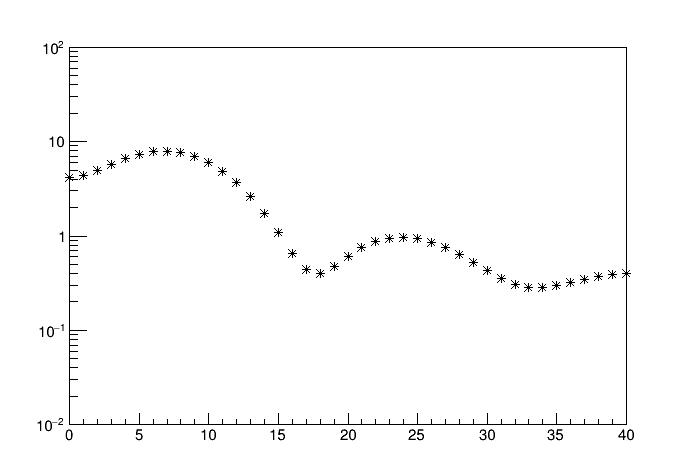

In [4]:
c1->Clear();
grate->GetXaxis()->SetLimits(0, 40);
grate->GetYaxis()->SetRangeUser(0.01 , 100); 
//grate->GetXaxis()->SetLimits(0, 50);
//grate->GetYaxis()->SetRangeUser(0.05 , 10); 
grate->SetMarkerStyle(3);
grate_6100->SetMarkerStyle(3);
grate_7000->SetMarkerStyle(3);
grate_6100->SetMarkerColor(4);
grate_7000->SetMarkerColor(4);
grate->Draw("ap");
//grate_6100->Draw("samep");
//grate_7000->Draw("samep");
c1->SetLogy(1);
c1->Draw();

In [5]:
Int_t all[100000000],all1[100000000],all2[100000000],count[1800],count2[1800];
Int_t countall=0,countall1=0,countall2=0;
Int_t getcount[1800];
Int_t then;
Int_t getcount1[1800],getcount2[1800];
Int_t then2;
Double_t maxn=100000000;
Double_t dtheta;
for(Int_t ii=0;ii<maxn;ii++){all[ii]=0;all1[ii]=0;all2[ii]=0;}
for(Int_t ii=0;ii<1800;ii++){getcount[ii]=0;count[ii]=0;getcount1[ii]=0;getcount2[ii]=0;count2[ii]=0;};
for(Int_t ii=0;ii<1800;ii++){
    dtheta=acos(1-(Double_t)(ii)/900.)*180./3.1416;
    count[ii]=(Int_t)(1000.*grate->Eval(dtheta));
    count2[ii]=(Int_t)(1000.*grate_6100->Eval(dtheta));
    //cout<<dtheta<<'\t'<<count[ii]<<'\t'<<count2[ii]<<'\n';
    for(Int_t jj=countall1;jj<(countall1+count[ii]);jj++){all1[jj]=ii;}
    for(Int_t jj=countall2;jj<(countall2+count2[ii]);jj++){all2[jj]=ii;}
    for(Int_t jj=countall;jj<(countall+count[ii]);jj++){all[jj]=ii;}
    for(Int_t jj=countall+count[ii];jj<(countall+count[ii]+count2[ii]);jj++){all[jj]=10000+ii;}
    countall+=count[ii]+count2[ii];
    countall1+=count[ii];
    countall2+=count2[ii];
}
Double_t thetheta;
for(Int_t ii=0;ii<maxn;ii++){
    then=rand()%(countall1+countall2);
    then=(then+(countall1+countall2)/2+rand()%2)%(countall1+countall2);
    //if(ii%1000==0)cout<<acos(1-(Double_t)(all[then]%10000)/900.)*180./3.1416<<'\n';
    getcount[all[then]%10000]++;
    if(all[then]<10000)getcount1[all[then]%10000]++;
    else if(all[then]>=10000)getcount2[all[then]%10000]++;
}
/*
for(Int_t ii=20;ii<1800;ii+=100){
    cout<<getcount[ii]*2<<'\t'<<getcount1[ii]+getcount2[ii]-2*getcount[ii]<<'\t'<<getcount1[ii]<<'\t'<<getcount2[ii]<<'\n';
}
*/
Double_t temprate_n=0,thealln=1;
for(Double_t ii=1;ii<1799;ii++){
    dtheta=acos(1-(Double_t)(ii)/900.)*180./3.1416;
    //cout<<dtheta<<'\n';
    if(ii<thealln||ii>(1800-thealln))grate2_all->SetPoint((Int_t)(ii),dtheta*10,(Double_t)(getcount[(Int_t)(ii)])*1800.*2./1000);
    if(ii>=thealln&&ii<=(1800-thealln)){
        for(Int_t jj=(Int_t)(ii-thealln);jj<=(Int_t)(ii+thealln);jj++)temprate_n+=(Double_t)(getcount[jj])*1800.*2./1000;
        grate2_all->SetPoint((Int_t)(ii),dtheta*10,temprate_n/thealln);
    }
    temprate_n=0;
    
    if(ii<thealln||ii>(1800-thealln))grate2_1->SetPoint((Int_t)(ii),dtheta*10,(Double_t)(getcount1[(Int_t)(ii)])*1800.*2./1000);
    if(ii>=thealln&&ii<=(1800-thealln)){
        for(Int_t jj=(Int_t)(ii-thealln);jj<=(Int_t)(ii+thealln);jj++)temprate_n+=(Double_t)(getcount1[jj])*1800.*2./1000;
        grate2_1->SetPoint((Int_t)(ii),dtheta*10,temprate_n/thealln);
    }
    temprate_n=0;
    
    if(ii<thealln||ii>(1800-thealln))grate2_2->SetPoint((Int_t)(ii),dtheta*10,(Double_t)(getcount2[(Int_t)(ii)])*1800.*2./1000);
    if(ii>=thealln&&ii<=(1800-thealln)){
        for(Int_t jj=(Int_t)(ii-thealln);jj<=(Int_t)(ii+thealln);jj++)temprate_n+=(Double_t)(getcount2[jj])*1800.*2./1000;
        grate2_2->SetPoint((Int_t)(ii),dtheta*10,temprate_n/thealln);
    }
    temprate_n=0;
}


cout<< countall<<'\t'<<countall1+countall2<<'\t'<<countall1<<'\t'<<countall2<<'\n';

337037	337037	337037	0


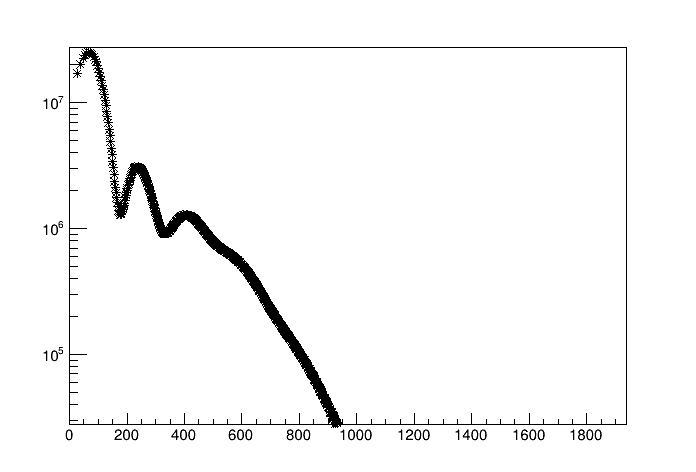

In [6]:
c1->Clear();
grate2_all->SetMarkerStyle(3);
grate2_1->SetMarkerStyle(3);
grate2_2->SetMarkerStyle(3);
grate2_all->SetMarkerColor(1);
grate2_1->SetMarkerColor(1);
grate2_2->SetMarkerColor(4);
//grate2_1->Draw("ap");
grate2_all->Draw("ap");
//grate2_2->Draw("samep");
c1->Draw();

In [7]:
/*
        ofstream write1;
        TString fileName = TString::Format("/data/d1/share/zhuhy/2023geant4sim/txt/N16_d_3He_0740_cm_cos.txt");
        write1.open(fileName.Data(), ios::out);
        write1<<countall<<endl;
        for(Int_t i=0; i<countall; i++){
            write1<<all[i]<<endl;
        }
        write1.close();
*/